In [2]:
pip install opencv-python mediapipe scikit-learn numpy


  Using cached scikit_learn-1.7.1-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.1-cp310-cp310-win_amd64.whl (8.9 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

   ---------------------------------------- 0/3 [threadpoolctl]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   ------------- -------------------------- 1/3 [joblib]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   -------------------------- ------------- 2/3 [scikit-learn]
   ---------------

In [3]:
pip install tensorflow


  Using cached tensorflow-2.19.0-cp310-cp310-win_amd64.whl.metadata (4.1 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp310-cp310-win_amd64.whl.metadata (6.5 kB)
  Using cached grpcio-1.74.0-cp310-cp310-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.1-py3-none-any.whl.metadata (5.9 kB)
  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached h5py-3.14.0-cp310-cp310-win_amd64.whl.metadata (2.7 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl.metadata (14 kB)
  Using cached markdown-3.8.2-py3-none-any.whl.metadata (5.1 kB)


  You can safely remove it manually.
  You can safely remove it manually.


In [5]:
import numpy
print(numpy.__version__)


2.2.6


In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [2]:
data_path = "."  

  

X, y = [], []


for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if not os.path.isdir(folder_path):
        continue

    for img_file in os.listdir(folder_path):
        if img_file.endswith(".png"):  
            img_path = os.path.join(folder_path, img_file)

            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  
            img = cv2.resize(img, (64, 64))  

            X.append(img)
            y.append(folder)  


X = np.array(X).reshape(-1, 64, 64, 1) / 255.0  
y = np.array(y)

print("✅ عدد الصور:", len(X))
print("✅ شكل X:", X.shape)
print("✅ عدد الفئات:", len(np.unique(y)))


✅ عدد الصور: 0
✅ شكل X: (0, 64, 64, 1)
✅ عدد الفئات: 0


In [3]:
import os

data_path = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog"  

print("المجلدات الموجودة:")
print(os.listdir(data_path))


المجلدات الموجودة:
['.ipynb_checkpoints', '00', '01', '02', '03', '04', '05', '06', '07', '08', '09', 'draft1.ipynb', 'gesture_cnn_model.h5', 'leapGestRecog', 'Untitled.ipynb', 'Untitled1.ipynb', 'Untitled2.ipynb']


In [4]:
import os
import cv2
import numpy as np

data_dir = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog" 

X = []
y = []
img_size = 64


for person in os.listdir(data_dir):
    person_path = os.path.join(data_dir, person)
    if not os.path.isdir(person_path):
        continue
    
    print(f"جارٍ معالجة الفئة: {person}")

    for class_name in os.listdir(person_path):
        class_path = os.path.join(person_path, class_name)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                img = cv2.resize(img, (img_size, img_size))
                X.append(img)
                y.append(class_name)
            except Exception as e:
                print(f"خطأ في تحميل الصورة {img_path}: {e}")

X = np.array(X).reshape(-1, img_size, img_size, 1)
y = np.array(y)

print("✅ عدد الصور:", len(X))
print("✅ شكل X:", X.shape)
print("✅ عدد الفئات:", len(set(y)))


جارٍ معالجة الفئة: .ipynb_checkpoints
جارٍ معالجة الفئة: 00
جارٍ معالجة الفئة: 01
جارٍ معالجة الفئة: 02
جارٍ معالجة الفئة: 03
جارٍ معالجة الفئة: 04
جارٍ معالجة الفئة: 05
جارٍ معالجة الفئة: 06
جارٍ معالجة الفئة: 07
جارٍ معالجة الفئة: 08
جارٍ معالجة الفئة: 09
جارٍ معالجة الفئة: leapGestRecog
خطأ في تحميل الصورة C:\Users\PointofSale\Downloads\archive\leapGestRecog\leapGestRecog\00\01_palm: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

خطأ في تحميل الصورة C:\Users\PointofSale\Downloads\archive\leapGestRecog\leapGestRecog\00\02_l: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

خطأ في تحميل الصورة C:\Users\PointofSale\Downloads\archive\leapGestRecog\leapGestRecog\00\03_fist: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split


X = np.array(X).reshape(-1, 64, 64, 1)  
y = np.array(y)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"🟢 X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"🔵 X_test: {X_test.shape}, y_test: {y_test.shape}")

🟢 X_train: (16000, 64, 64, 1), y_train: (16000,)
🔵 X_test: (4000, 64, 64, 1), y_test: (4000,)


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(np.unique(y)), activation='softmax')  
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

C:\Users\PointofSale\anaconda3\envs\gesture_clean\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)


y_train_cat = to_categorical(y_train_encoded, num_classes=10)
y_test_cat = to_categorical(y_test_encoded, num_classes=10)



In [8]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


num_classes = len(label_encoder.classes_)  
y_train_cat = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes=num_classes)


from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))  
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))  


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])  


history = model.fit(X_train, y_train_cat,
                    epochs=10,
                    validation_data=(X_test, y_test_cat))


C:\Users\PointofSale\anaconda3\envs\gesture_clean\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7281 - loss: 0.9258 - val_accuracy: 0.9835 - val_loss: 0.1011
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9869 - loss: 0.0793 - val_accuracy: 0.9977 - val_loss: 0.0318
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9981 - loss: 0.0224 - val_accuracy: 0.9998 - val_loss: 0.0116
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9994 - loss: 0.0101 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9997 - loss: 0.0057 - val_accuracy: 0.9970 - val_loss: 0.0162
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9936 - loss: 0.0257 - val_accuracy: 0.9998 - val_loss: 0.0072
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9991 - loss: 0.0055 - val_accuracy: 0.9998 - val_loss: 0.0024
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9999 - loss: 0.0013 - val

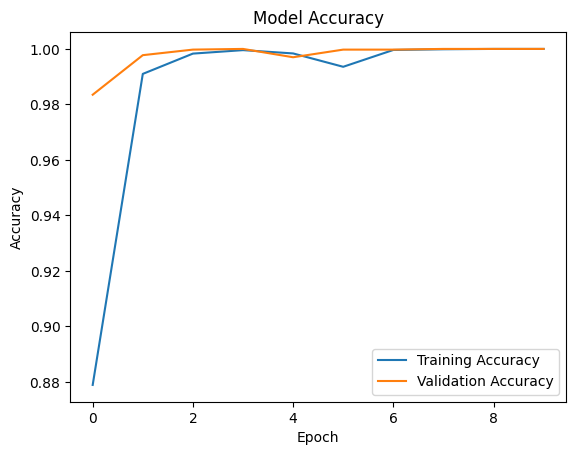

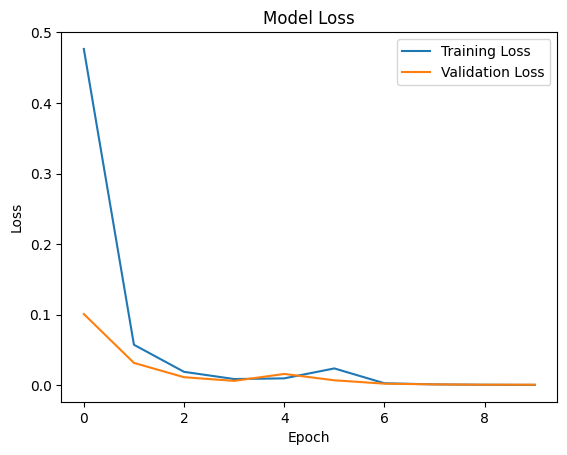

In [9]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

model.save("gesture_cnn_model.h5")
print("Model saved successfully.")

In [ ]:
from tensorflow.keras.models import load_model


model = load_model("gesture_cnn_model.h5")
print("Model loaded successfully.")

In [10]:
import cv2
import numpy as np


img_path = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog\00\01_palm\frame_00_01_0001.png"

 
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)  
img = np.expand_dims(img, axis=0)   

pred = model.predict(img)
predicted_label = np.argmax(pred)
print("Predicted class:", predicted_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Predicted class: 0


In [11]:

img_path = r"C:\Users\PointofSale\Downloads\archive\leapGestRecog\00\01_palm\frame_00_01_0001.png"


img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))
img = img.astype('float32') / 255.0
img = np.expand_dims(img, axis=-1)  
img = np.expand_dims(img, axis=0)   


gesture_labels = [
    "Palm", "L", "Fist", "Fist_moved", "Thumb",
    "Index", "Ok", "Palm_moved", "C", "Down"
]


pred = model.predict(img)
predicted_label = np.argmax(pred)
gesture_name = gesture_labels[predicted_label]

print("Predicted class index:", predicted_label)
print("Predicted gesture:", gesture_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Predicted class index: 0
Predicted gesture: Palm


In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np


model = load_model("gesture_cnn_model.h5")  

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    roi = frame[100:300, 100:300]

    cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 2)
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 2)
    _, thresh = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    cv2.imshow("Thresh", thresh)
    cv2.imshow("Frame", frame)

    resized = cv2.resize(thresh, (64, 64))
    normalized = resized.astype('float32') / 255.0
    img_input = np.expand_dims(normalized, axis=(0, -1))  

    prediction = model.predict(img_input)
    predicted_class = np.argmax(prediction)
    print("Predicted:", predicted_class)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [15]:
pip install pyautogui



  Using cached PyAutoGUI-0.9.54.tar.gz (61 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached PyMsgBox-1.0.9.tar.gz (18 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached pytweening-1.2.0.tar.gz (171 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached pyscreeze-1.0.1.tar.gz (27 kB)
  Installing build dependencies: started
  Installi

  DEPRECATION: Building 'pygetwindow' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pygetwindow'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'pytweening' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'pytweening'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  DEPRECATION: Building 'mouseinfo' using the legacy setup.py bdist_wh

In [12]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
import os
import webbrowser
import pyautogui


model = load_model("gesture_cnn_model.h5")


gesture_names = {
    0: "Palm",       
    1: "L",           
    2: "Fist",        
    3: "Fist_moved",  
    4: "Thumb",       
    5: "Index",       
    6: "Ok",          
    7: "Palm_moved",  
    8: "C",           
    9: "Down"         
}


def execute_action(gesture):
    if gesture == "Palm":
        os.startfile("C:/Users/User/Desktop/file.txt")  
        return "Opening file"
    elif gesture == "L":
        os.system("taskkill /f /im notepad.exe")  
        return "Closing file"
    elif gesture == "Fist":
        os.startfile("C:/Users/User/Music/song.mp3")
        return "Playing music"
    elif gesture == "Fist_moved":
        os.system("taskkill /f /im wmplayer.exe")
        return "Stopping music"
    elif gesture == "Thumb":
        pyautogui.press("volumeup")
        return "Volume up"
    elif gesture == "Index":
        pyautogui.press("volumedown")
        return "Volume down"
    elif gesture == "Ok":
        webbrowser.open("https://www.google.com")
        return "Opening browser"
    elif gesture == "Palm_moved":
        os.system("taskkill /f /im chrome.exe")
        return "Closing browser"
    elif gesture == "C":
        pyautogui.hotkey("win", "prtsc")  
        return "Taking screenshot"
    elif gesture == "Down":
        return "Exiting..."
    else:
        return "No action"

cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    roi = frame[100:300, 100:300]
    cv2.rectangle(frame, (100, 100), (300, 300), (0, 255, 0), 2)

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5, 5), 2)
    _, thresh = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    resized = cv2.resize(thresh, (64, 64))
    normalized = resized.astype('float32') / 255.0
    img_input = np.expand_dims(normalized, axis=(0, -1))

    prediction = model.predict(img_input)
    predicted_class = np.argmax(prediction)
    gesture_name = gesture_names.get(predicted_class, "Unknown")

    action_message = execute_action(gesture_name)

    # عرض على الشاشة
    cv2.putText(frame, f"Gesture: {gesture_name}", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)
    cv2.putText(frame, f"Action: {action_message}", (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    cv2.imshow("Thresh", thresh)
    cv2.imshow("Frame", frame)

    if gesture_name == "Down":
        break

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model


model = load_model('gesture_cnn_model.h5')


gesture_classes = ['Palm', 'L', 'Fist', 'Fist_moved', 'Thumb', 'Index', 'Ok', 'Palm_moved', 'C', 'Down']


IMG_WIDTH = 64
IMG_HEIGHT = 64


cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    x1, y1, x2, y2 = 300, 100, 600, 400
    roi = frame[y1:y2, x1:x2]

    
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 2)
    _, thresh = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    resized = cv2.resize(thresh, (IMG_WIDTH, IMG_HEIGHT))
    normalized = resized.astype('float32') / 255.0
    reshaped = normalized.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)

    
    prediction = model.predict(reshaped)
    class_id = np.argmax(prediction)
    gesture_name = gesture_classes[class_id]

    
    cv2.putText(frame, gesture_name, (x1, y1-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)


    cv2.imshow("Webcam", frame)
    cv2.imshow("ROI", thresh)

    key = cv2.waitKey(1)
    if key == 27:
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1

In [22]:
import cv2
import numpy as np
import time
import subprocess
from tensorflow.keras.models import load_model


model = load_model('gesture_cnn_model.h5')


gesture_classes = ['Palm', 'L', 'Fist', 'Fist_moved', 'Thumb', 'Index', 'Ok', 'Palm_moved', 'C', 'Down']


gesture_actions = {
    'Palm': lambda: subprocess.Popen(['calc']),                                
    'L': lambda: subprocess.Popen(['notepad']),                               
    'Fist': lambda: subprocess.Popen(['cmd', '/c', 'start https://www.google.com']), 
    'Fist_moved': lambda: subprocess.Popen(['cmd', '/c', 'start https://www.youtube.com']), 
    'Thumb': lambda: subprocess.call("nircmd.exe mutesysvolume 0"),           
    'Index': lambda: subprocess.call("nircmd.exe mutesysvolume 1"),           
    'Ok': lambda: subprocess.call("nircmd.exe savescreenshot screenshot.png"),
    'Palm_moved': lambda: subprocess.call("taskkill /f /im chrome.exe"),      
    'C': lambda: print("No action assigned to 'C'"),
    'Down': lambda: print("No action assigned to 'Down'")
}

IMG_WIDTH = 64
IMG_HEIGHT = 64

cap = cv2.VideoCapture(0)
last_executed = None
cooldown = 2  
last_time = time.time()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    x1, y1, x2, y2 = 300, 100, 600, 400
    roi = frame[y1:y2, x1:x2]

    
    cv2.rectangle(frame, (x1, y1), (x2, y2), (0,255,0), 2)

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (5,5), 2)
    _, thresh = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    resized = cv2.resize(thresh, (IMG_WIDTH, IMG_HEIGHT))
    normalized = resized.astype('float32') / 255.0
    reshaped = normalized.reshape(1, IMG_WIDTH, IMG_HEIGHT, 1)

    
    prediction = model.predict(reshaped)
    class_id = np.argmax(prediction)
    gesture_name = gesture_classes[class_id]

   
    cv2.putText(frame, f"Gesture: {gesture_name}", (x1, y1-40), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

    current_time = time.time()
    if gesture_name != last_executed and (current_time - last_time) > cooldown:
        action = gesture_actions.get(gesture_name)
        if action:
            print(f"Gesture: {gesture_name} --> Action executed.")
            action()
            last_executed = gesture_name
            last_time = current_time

    
    cv2.imshow("Webcam", frame)
    cv2.imshow("ROI", thresh)

    key = cv2.waitKey(1)
    if key == 27:  # Esc
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Gesture: C --> Action executed.
No action assigned to 'C'
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5